# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [34]:
diff

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,-0.050232,-0.335085
16092,fffac626da707b1b5ab11e8431a4d0a2,-0.003778,0.177779
16093,fffc0cacd305dd51f316424bbb08d1bd,-0.001760,0.164916
16094,fffe4f5646aa39c7f97f95ae2679ce64,-0.009391,0.162916


In [10]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0


In [7]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175


## 1. Drop columns

cons_12m

In [8]:
import matplotlib.pyplot as plt

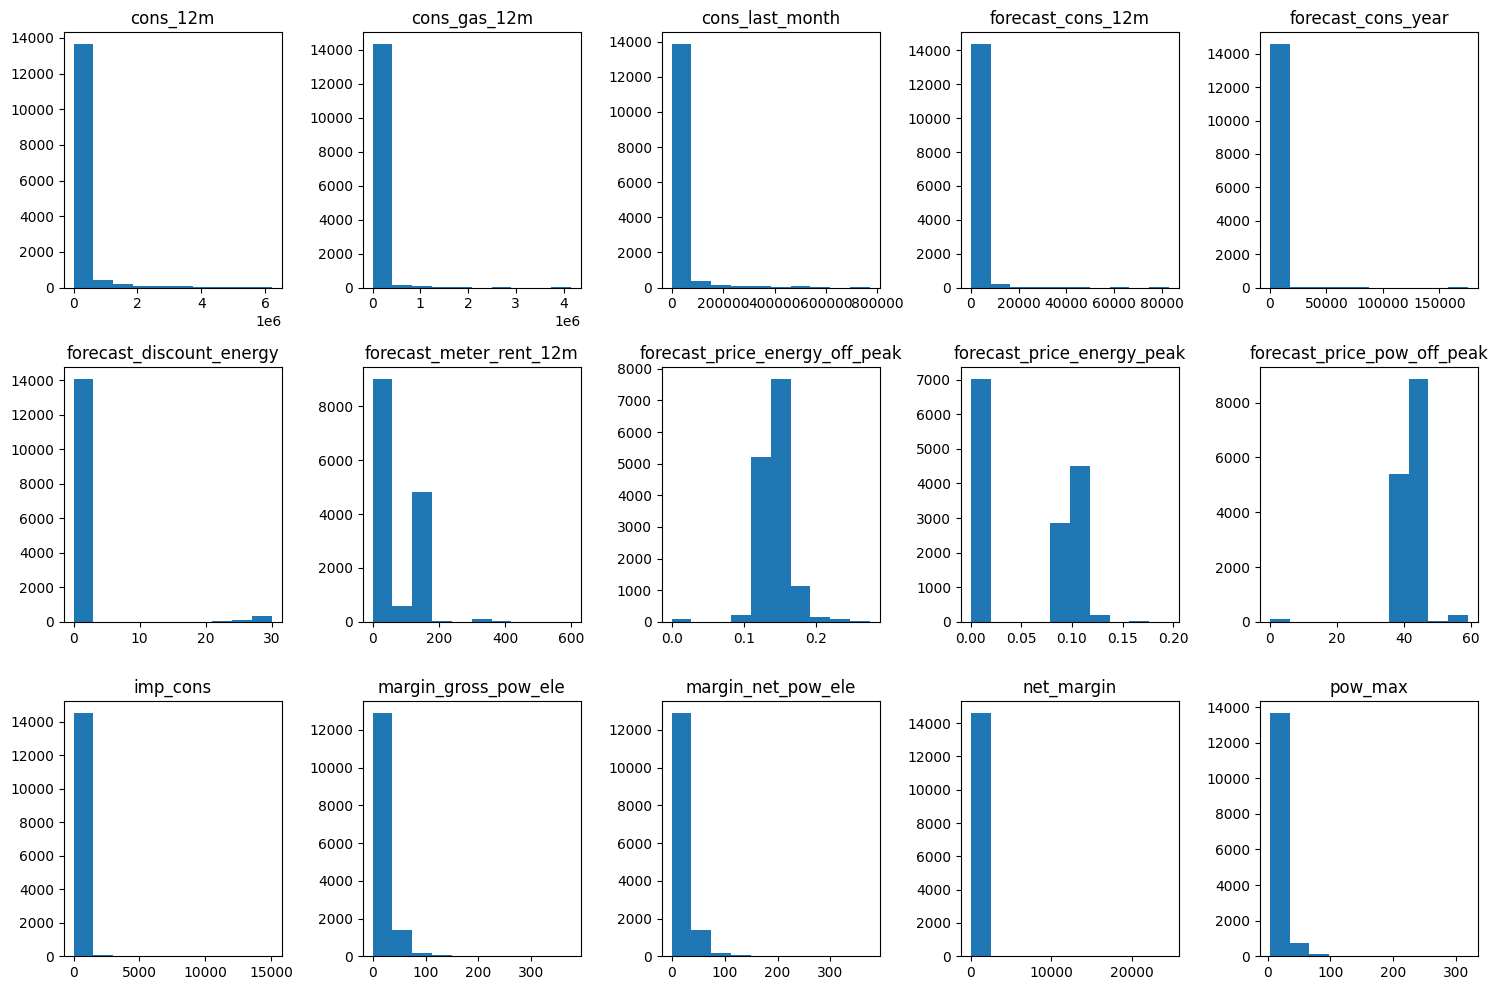

In [16]:
fig, axs = plt.subplots(3, 5, figsize=(15, 10))
axs = axs.flatten()

columns = [
    'cons_12m', 'cons_gas_12m', 'cons_last_month',
    'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
    'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
    'net_margin', 'pow_max'
]


for idx, col in enumerate(columns):
    axs[idx].hist(df[col])  
    axs[idx].set_title(col)


plt.tight_layout()
plt.show()

Dropping cons_last_month due to 96 correlation with cons_12m. Similar for margin_gross_pow_ele. Dropping forecast_price_pow_off_peak due to lack of relevance. Further, no need for forecast_cons_year of forecast_cons_12m is in.

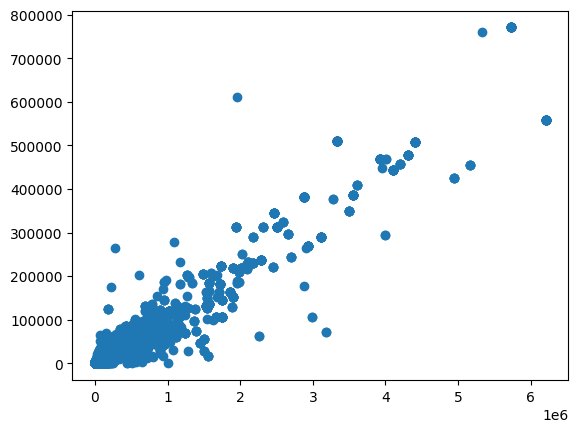

In [18]:
plt.scatter(df['cons_12m'], df['cons_last_month'])

In [21]:
dropping_cols = ['cons_last_month', 'forecast_cons_year', 'forecast_meter_rent_12m', 'forecast_price_pow_off_peak', 'margin_gross_pow_ele']

In [22]:
df2 = df.drop(columns=dropping_cols)

In [24]:
df2['cons_total_12m'] = df2['cons_12m'] + df2['cons_gas_12m']
df2 = df2.drop(columns=['cons_12m', 'cons_gas_12m'])

In [27]:
df2

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,...,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,cons_total_12m
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.114481,0.098142,...,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,54946
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.145711,0.000000,...,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,4660
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.165794,0.087899,...,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,544
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.146694,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,1584
4,149d57cf92fc41cf94415803a877cb4b,MISSING,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,0.0,0.116900,0.100015,...,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,4425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0.0,0.138305,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,80210
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,0.0,0.100167,0.091892,...,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1,7223
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,0.0,0.116900,0.100015,...,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1,1844
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0.0,0.145711,0.000000,...,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,131


In [26]:
df2['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

In [32]:
import numpy as np
df3 = df2.iloc[:, np.r_[0:18, 36:38]]

In [33]:
df3

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,cons_total_12m
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.114481,0.098142,1,0.00,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,54946
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.145711,0.000000,0,0.00,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.165794,0.087899,0,0.00,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.146694,0.000000,0,0.00,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584
4,149d57cf92fc41cf94415803a877cb4b,MISSING,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,0.0,0.116900,0.100015,0,52.32,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,4425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0.0,0.138305,0.000000,1,0.00,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,80210
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,0.0,0.100167,0.091892,0,15.94,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,7223
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,0.0,0.116900,0.100015,0,18.05,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,1844
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0.0,0.145711,0.000000,0,0.00,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,131


# Merge

In [35]:
merged_df = pd.merge(df3, diff, left_on='id', right_on='id', how = 'left')
merged_df

,id,channel_sales,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,cons_total_12m,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.114481,0.098142,...,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,54946,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.145711,0.000000,...,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.165794,0.087899,...,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.146694,0.000000,...,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,0.0,0.116900,0.100015,...,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,4425,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0.0,0.138305,0.000000,...,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,80210,-0.008653,0.177779
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,0.0,0.100167,0.091892,...,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,7223,-0.007395,0.236694
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,0.0,0.116900,0.100015,...,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,1844,-0.006192,0.162916
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0.0,0.145711,0.000000,...,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,131,-0.003767,0.177779


In [38]:
merged_df['date_activ_year'] = merged_df['date_activ'].dt.year
merged_df['date_end_year'] = merged_df['date_end'].dt.year
merged_df['date_modif_prod_year'] = merged_df['date_modif_prod'].dt.year
merged_df['date_renewal_year'] = merged_df['date_renewal'].dt.year
drop_dates = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
merged_df = merged_df.drop(columns=drop_dates)

In [39]:
merged_df

,id,channel_sales,forecast_cons_12m,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,...,origin_up,pow_max,churn,cons_total_12m,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,date_activ_year,date_end_year,date_modif_prod_year,date_renewal_year
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.00,0.0,0.114481,0.098142,1,0.00,25.44,2,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,54946,0.020057,3.700961,2013,2016,2015,2015
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,189.95,0.0,0.145711,0.000000,0,0.00,16.38,1,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,4660,-0.003767,0.177779,2009,2016,2009,2015
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,47.96,0.0,0.165794,0.087899,0,0.00,28.60,1,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,544,-0.004670,0.177779,2010,2016,2010,2015
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,240.04,0.0,0.146694,0.000000,0,0.00,30.22,1,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,1584,-0.004547,0.177779,2010,2016,2010,2015
4,149d57cf92fc41cf94415803a877cb4b,MISSING,445.75,0.0,0.116900,0.100015,0,52.32,44.91,1,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,4425,-0.006192,0.162916,2010,2016,2010,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,4648.01,0.0,0.138305,0.000000,1,0.00,27.88,2,...,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,80210,-0.008653,0.177779,2012,2016,2015,2014
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,631.69,0.0,0.100167,0.091892,0,15.94,0.00,1,...,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,7223,-0.007395,0.236694,2012,2016,2012,2015
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,190.39,0.0,0.116900,0.100015,0,18.05,39.84,1,...,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,1844,-0.006192,0.162916,2012,2016,2012,2015
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,19.34,0.0,0.145711,0.000000,0,0.00,13.08,1,...,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,131,-0.003767,0.177779,2012,2016,2012,2015
